In [1]:
import plotly.express as px
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings as wr
wr.filterwarnings('ignore')
sns.set_style('whitegrid')

ev_data=pd.read_csv('Electric_Vehicle_Population_Data.csv')
ev_data.head()


,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJYGDEE1L,King,Seattle,WA,98122.0,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291,0,37.0,125701579,POINT (-122.30839 47.610365),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
1,7SAYGDEE9P,Snohomish,Bothell,WA,98021.0,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,1.0,244285107,POINT (-122.179458 47.802589),PUGET SOUND ENERGY INC,5.306105e+10
2,5YJSA1E4XK,King,Seattle,WA,98109.0,2019,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,270,0,36.0,156773144,POINT (-122.34848 47.632405),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
3,5YJSA1E27G,King,Issaquah,WA,98027.0,2016,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0,5.0,165103011,POINT (-122.03646 47.534065),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
4,5YJYGDEE5M,Kitsap,Suquamish,WA,98392.0,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,23.0,205138552,POINT (-122.55717 47.733415),PUGET SOUND ENERGY INC,5.303594e+10


In [2]:
ev_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177866 entries, 0 to 177865
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         177866 non-null  object 
 1   County                                             177861 non-null  object 
 2   City                                               177861 non-null  object 
 3   State                                              177866 non-null  object 
 4   Postal Code                                        177861 non-null  float64
 5   Model Year                                         177866 non-null  int64  
 6   Make                                               177866 non-null  object 
 7   Model                                              177866 non-null  object 
 8   Electric Vehicle Type                              177866 non-null  object

In [3]:
ev_data.isnull().sum()

VIN (1-10)                                             0
County                                                 5
City                                                   5
State                                                  0
Postal Code                                            5
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 389
DOL Vehicle ID                                         0
Vehicle Location                                       9
Electric Utility                                       5
2020 Census Tract                                      5
dtype: int64

In [4]:
ev_data=ev_data.dropna()
ev_data

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJYGDEE1L,King,Seattle,WA,98122.0,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291,0,37.0,125701579,POINT (-122.30839 47.610365),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
1,7SAYGDEE9P,Snohomish,Bothell,WA,98021.0,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,1.0,244285107,POINT (-122.179458 47.802589),PUGET SOUND ENERGY INC,5.306105e+10
2,5YJSA1E4XK,King,Seattle,WA,98109.0,2019,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,270,0,36.0,156773144,POINT (-122.34848 47.632405),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
3,5YJSA1E27G,King,Issaquah,WA,98027.0,2016,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0,5.0,165103011,POINT (-122.03646 47.534065),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
4,5YJYGDEE5M,Kitsap,Suquamish,WA,98392.0,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,23.0,205138552,POINT (-122.55717 47.733415),PUGET SOUND ENERGY INC,5.303594e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177861,7SAYGDEE3N,Pierce,Bonney Lake,WA,98391.0,2022,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,31.0,195224452,POINT (-122.183805 47.18062),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.305307e+10
177862,KM8K23AG1P,Mason,Shelton,WA,98584.0,2023,HYUNDAI,KONA ELECTRIC,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,35.0,228454180,POINT (-123.105305 47.211085),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,5.304596e+10
177863,5YJYGDEE6M,Grant,Quincy,WA,98848.0,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,13.0,168797219,POINT (-119.8493873 47.2339933),PUD NO 2 OF GRANT COUNTY,5.302501e+10
177864,WVGKMPE27M,King,Black Diamond,WA,98010.0,2021,VOLKSWAGEN,ID.4,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,5.0,182448801,POINT (-122.00451 47.312185),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10


In [5]:
ev_data.isnull().sum()

VIN (1-10)                                           0
County                                               0
City                                                 0
State                                                0
Postal Code                                          0
Model Year                                           0
Make                                                 0
Model                                                0
Electric Vehicle Type                                0
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0
Electric Range                                       0
Base MSRP                                            0
Legislative District                                 0
DOL Vehicle ID                                       0
Vehicle Location                                     0
Electric Utility                                     0
2020 Census Tract                                    0
dtype: int64

In [6]:
ev_data.shape

(177473, 17)

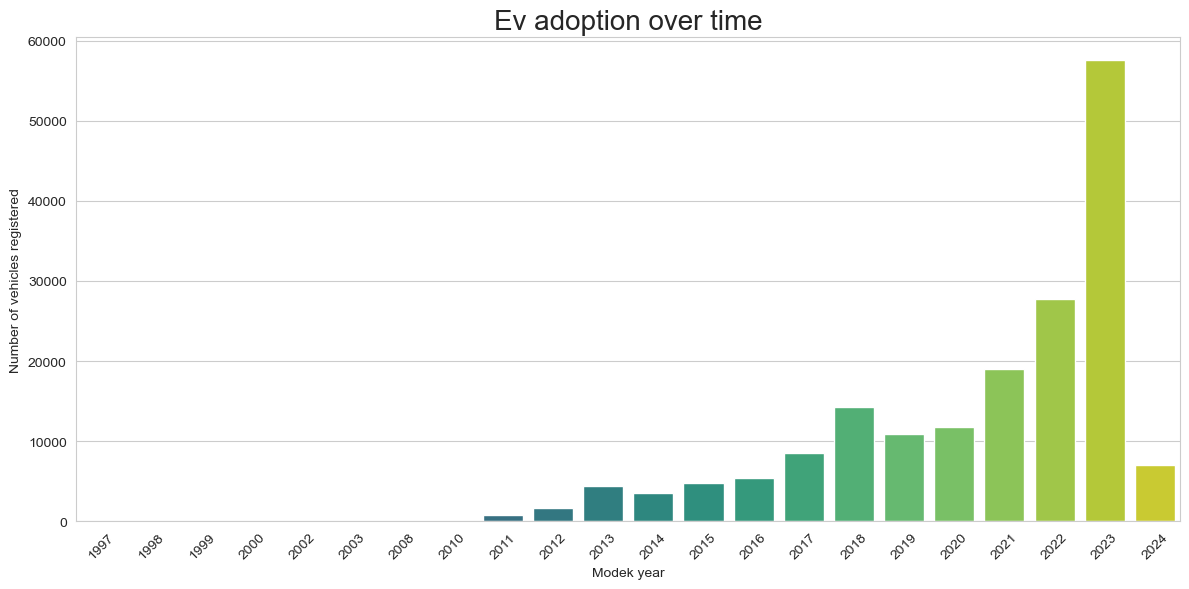

In [7]:
#ev adoption over time
plt.figure(figsize=(12,6))
ev_adoption_by_year=ev_data['Model Year'].value_counts().sort_index()
sns.barplot(x=ev_adoption_by_year.index,y=ev_adoption_by_year.values,palette='viridis')
plt.title('Ev adoption over time',fontsize=20)
plt.xlabel('Modek year')
plt.ylabel('Number of vehicles registered')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [8]:
ev_county_distribution=ev_data['County'].value_counts()
top_counties=ev_county_distribution.head(3).index
top_counties_data=ev_data[ev_data['County'].isin(top_counties)]
ev_city_distribution_top_counties=top_counties_data.groupby(['County','City']).size().sort_values(ascending=False).reset_index(name='Number of vehicles')
top_cities=ev_city_distribution_top_counties.head(10)
top_cities


,County,City,Number of vehicles
0,King,Seattle,29447
1,King,Bellevue,8930
2,King,Redmond,6478
3,King,Kirkland,5362
4,King,Sammamish,5280
5,King,Renton,4980
6,Snohomish,Bothell,4663
7,Pierce,Tacoma,3722
8,King,Tukwila,2927
9,King,Kent,2782


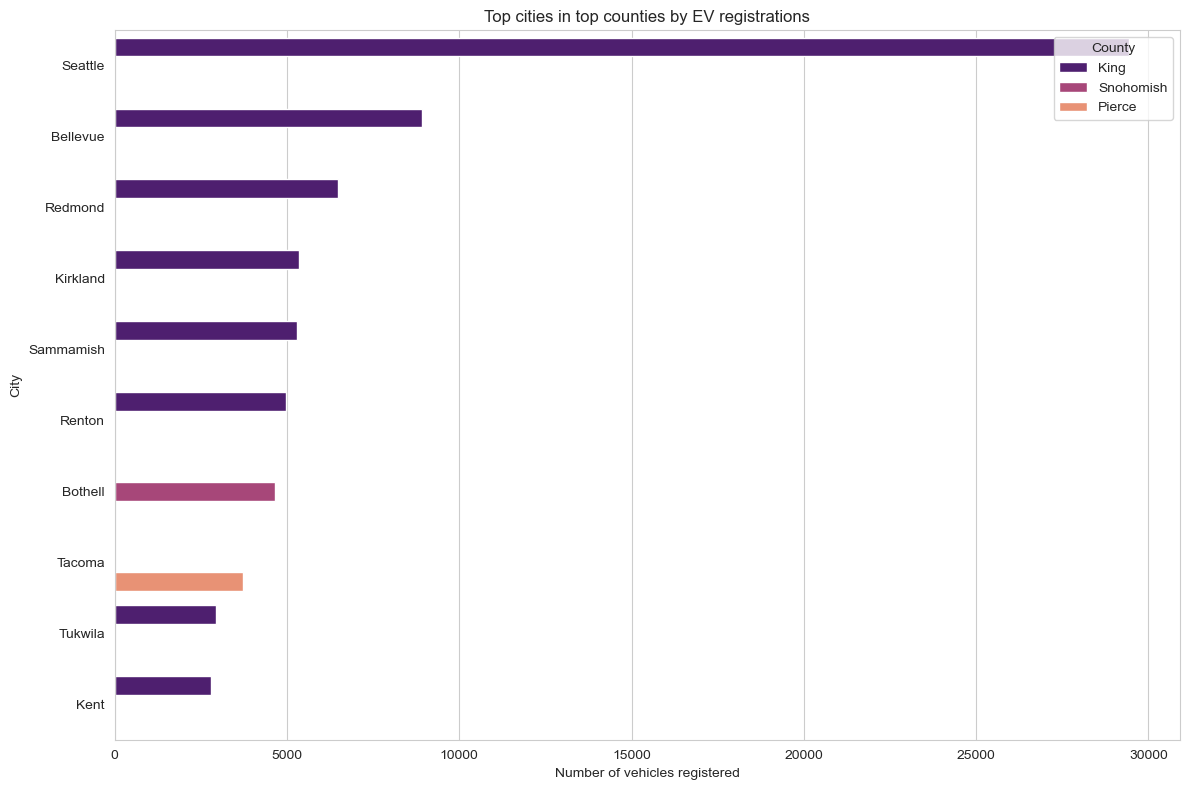

In [9]:
plt.figure(figsize=(12,8))
sns.barplot(x='Number of vehicles',y='City',hue='County',data=top_cities,palette='magma')
plt.title('Top cities in top counties by EV registrations')
plt.xlabel('Number of vehicles registered')
plt.ylabel('City')
plt.legend(title='County')
plt.tight_layout()
plt.show()

In [13]:
ev_type_distribution=ev_data['Electric Vehicle Type'].value_counts()
ev_type_distribution

Electric Vehicle Type
Battery Electric Vehicle (BEV)            138947
Plug-in Hybrid Electric Vehicle (PHEV)     38526
Name: count, dtype: int64

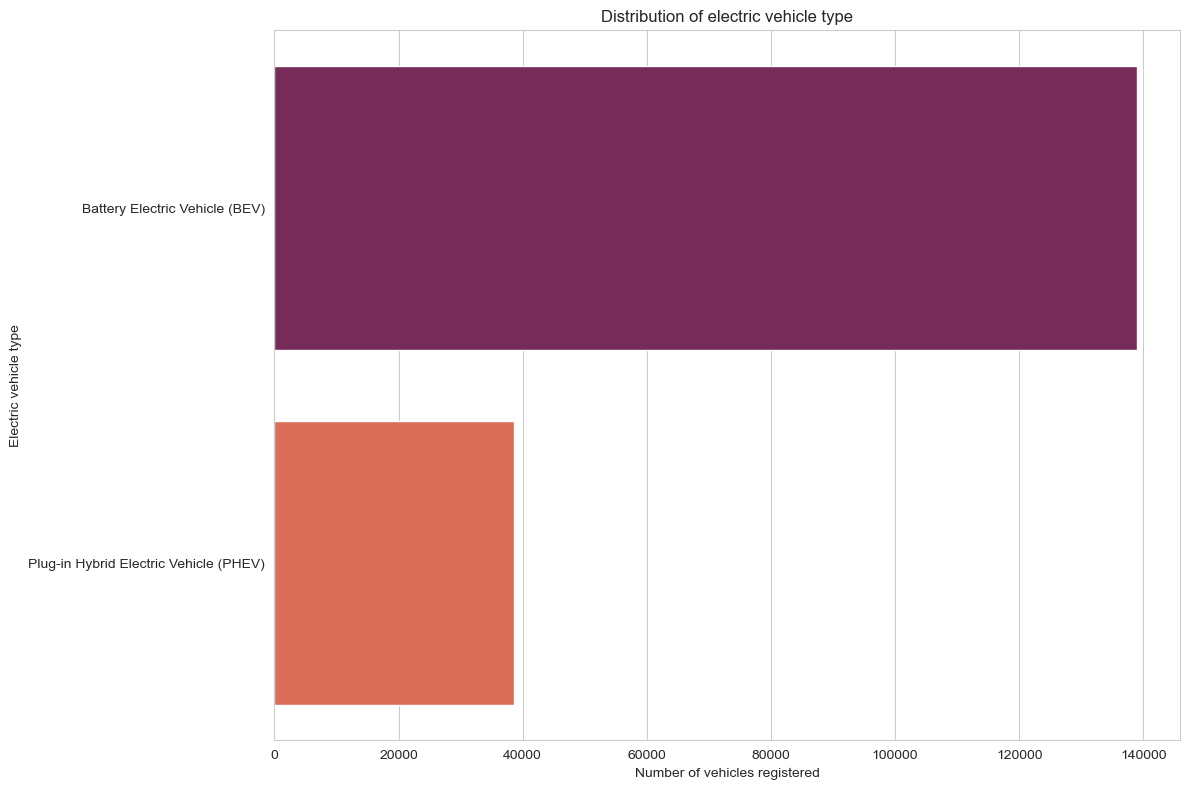

In [17]:
plt.figure(figsize=(12,8))
sns.barplot(x=ev_type_distribution.values,y=ev_type_distribution.index,palette='rocket')
plt.title('Distribution of electric vehicle type')
plt.xlabel('Number of vehicles registered')
plt.ylabel('Electric vehicle type')
plt.tight_layout()
plt.show()

In [20]:
ev_make_distribution=ev_data['Make'].value_counts().head(10)
ev_make_distribution

Make
TESLA         79471
NISSAN        13984
CHEVROLET     13651
FORD           9177
BMW            7556
KIA            7423
TOYOTA         6254
VOLKSWAGEN     4993
JEEP           4468
HYUNDAI        4398
Name: count, dtype: int64

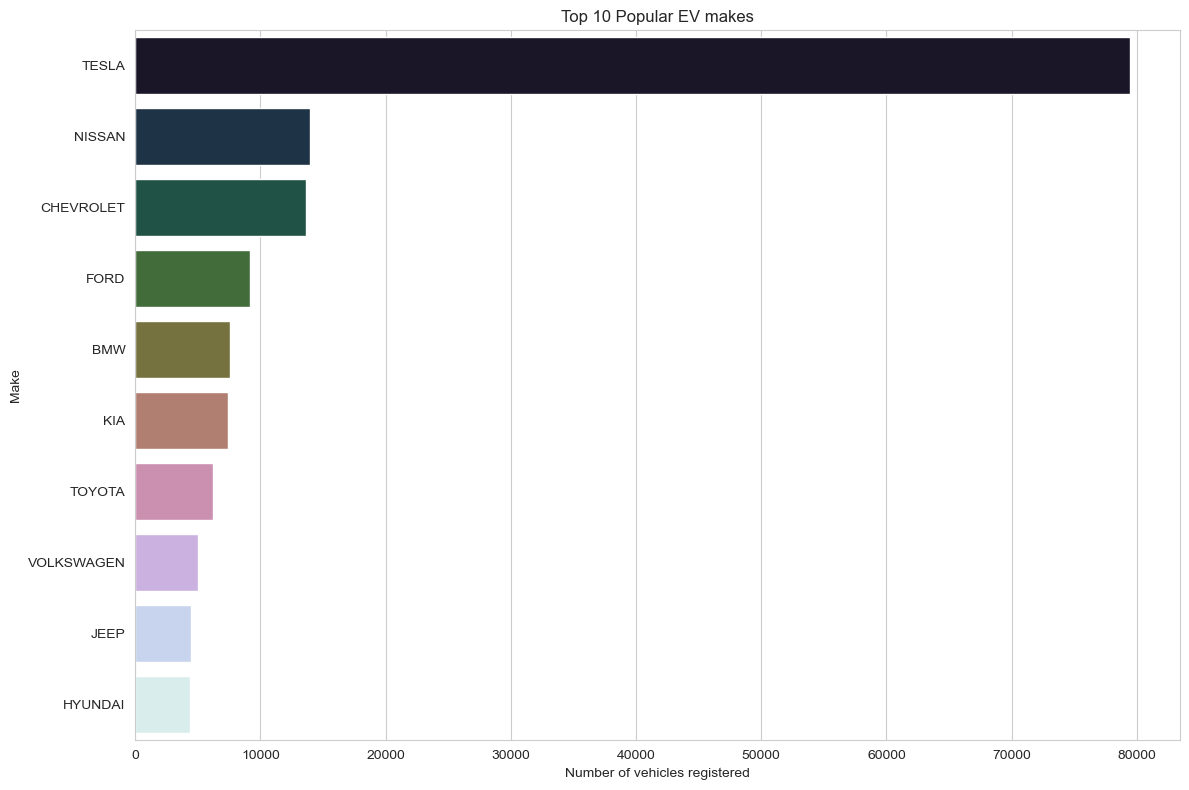

In [21]:
plt.figure(figsize=(12,8))
sns.barplot(x=ev_make_distribution.values,y=ev_make_distribution.index,palette='cubehelix')
plt.title('Top 10 Popular EV makes')
plt.xlabel('Number of vehicles registered')
plt.ylabel('Make')
plt.tight_layout()
plt.show()

In [24]:
top_3_makes=ev_make_distribution.head(3).index
top_makes_data=ev_data[ev_data['Make'].isin(top_3_makes)]
ev_model_distribution_top_makes=top_makes_data.groupby(['Make','Model']).size().sort_values(ascending=False).reset_index(name='Number of vehicles')
top_models=ev_model_distribution_top_makes.head(10)
top_models

,Make,Model,Number of vehicles
0,TESLA,MODEL Y,35921
1,TESLA,MODEL 3,30009
2,NISSAN,LEAF,13352
3,TESLA,MODEL S,7711
4,CHEVROLET,BOLT EV,6811
5,TESLA,MODEL X,5784
6,CHEVROLET,VOLT,4782
7,CHEVROLET,BOLT EUV,1770
8,NISSAN,ARIYA,632
9,CHEVROLET,SPARK,240


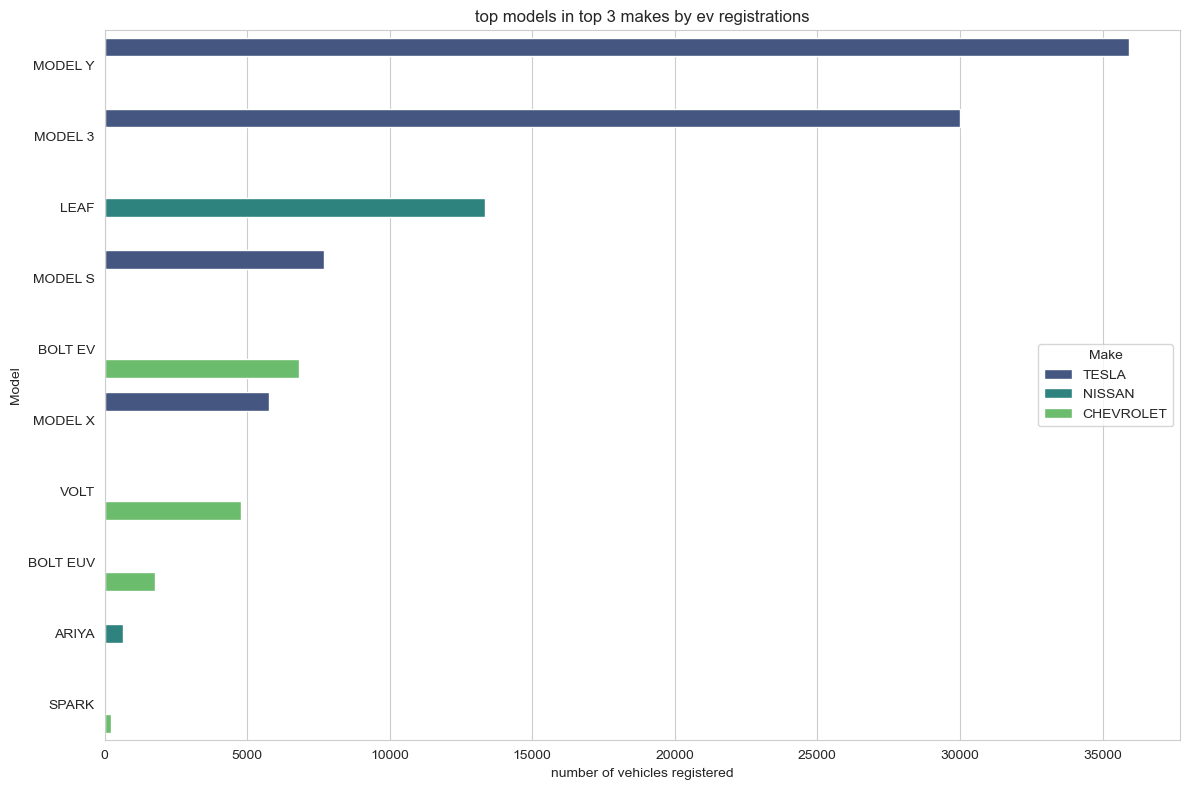

In [25]:
plt.figure(figsize=(12,8))
sns.barplot(x='Number of vehicles',y='Model',hue='Make',data=top_models,palette='viridis')
plt.title('top models in top 3 makes by ev registrations')
plt.xlabel('number of vehicles registered')
plt.ylabel('Model')
plt.legend(title='Make',loc='center right')
plt.tight_layout()
plt.show()

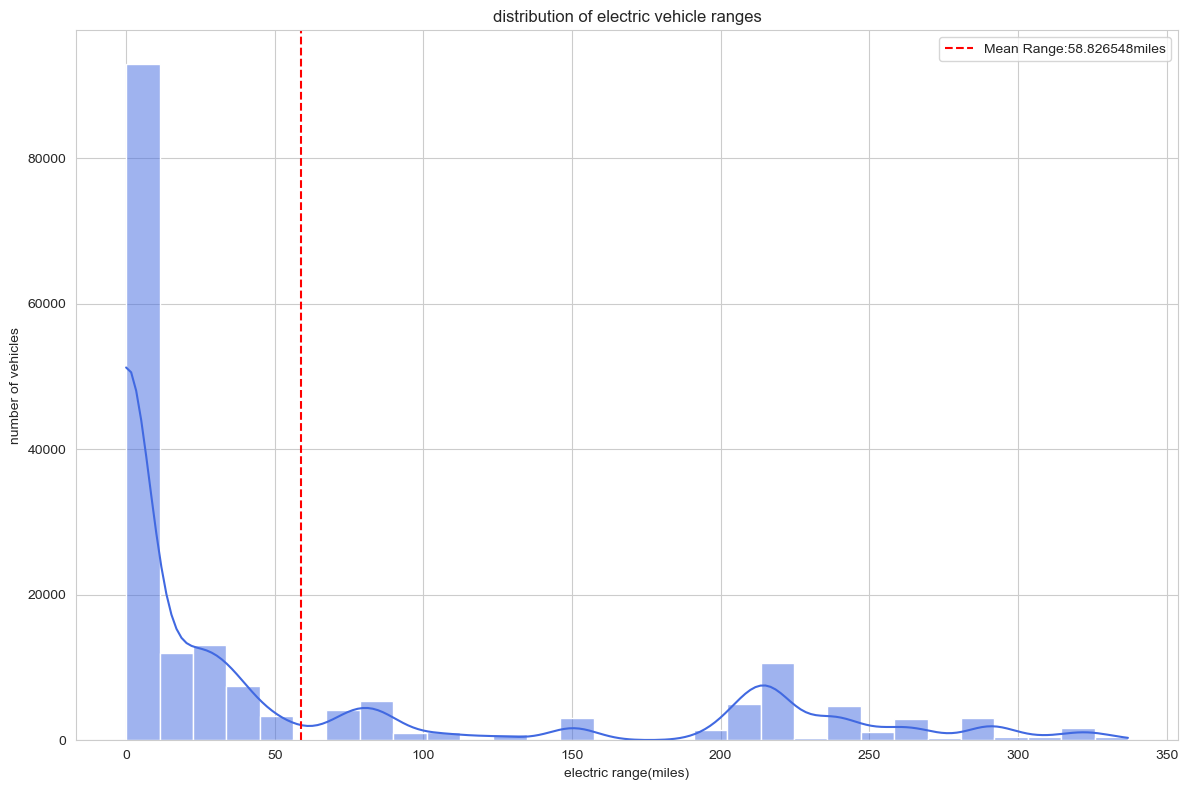

In [35]:
plt.figure(figsize=(12,8))
sns.histplot(ev_data['Electric Range'],bins=30,kde=True,color='royalblue')
plt.title('distribution of electric vehicle ranges')
plt.xlabel('electric range(miles)')
plt.ylabel('number of vehicles')
plt.axvline(ev_data['Electric Range'].mean(),color='red',linestyle='--',label=f"Mean Range:{ev_data['Electric Range'].mean():2f}miles")
plt.legend()
plt.tight_layout()
plt.show()

In [37]:
average_range_by_year=ev_data.groupby('Model Year')['Electric Range'].mean().reset_index()
average_range_by_year

,Model Year,Electric Range
0,1997,39.000000
1,1998,58.000000
2,1999,74.000000
3,2000,58.000000
4,2002,95.000000
5,2003,95.000000
6,2008,220.000000
7,2010,226.086957
8,2011,70.891613
9,2012,61.172243


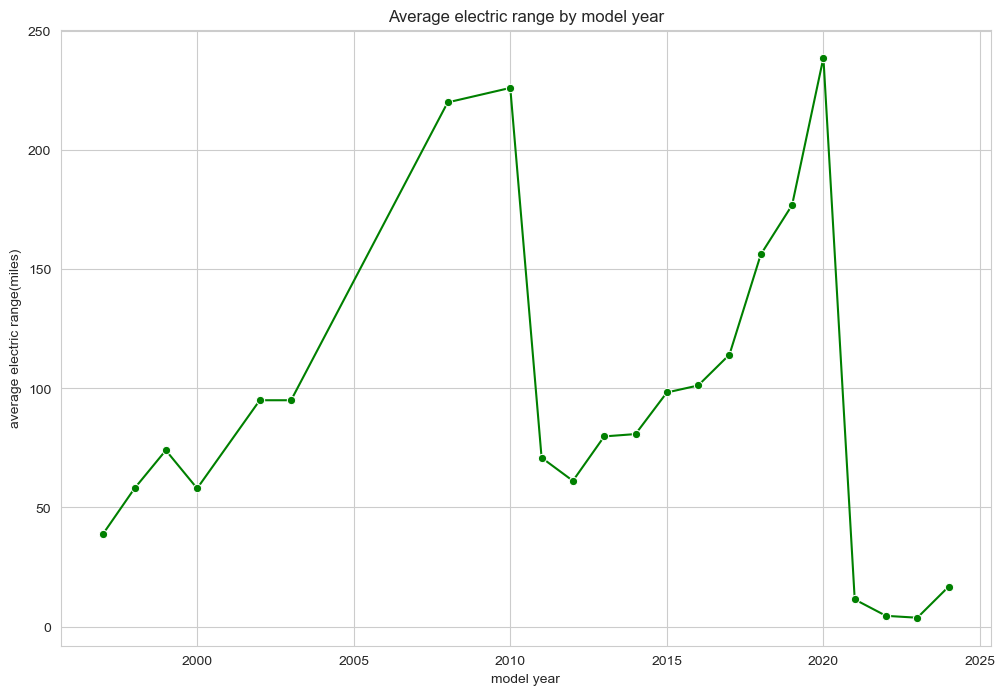

In [45]:
plt.figure(figsize=(12,8))
sns.lineplot(x='Model Year',y='Electric Range',data=average_range_by_year,marker='o',color='green')
plt.title('Average electric range by model year')
plt.xlabel('model year')
plt.ylabel('average electric range(miles)')
plt.grid(True)
plt.show()

In [56]:
average_range_by_model=top_makes_data.groupby(['Make','Model'])['Electric Range'].mean().sort_values(ascending=False).reset_index()
top_range_models=average_range_by_model.head(10)
top_range_models

,Make,Model,Electric Range
0,TESLA,ROADSTER,234.673913
1,TESLA,MODEL S,176.794449
2,CHEVROLET,BOLT EV,154.857143
3,TESLA,MODEL X,137.192600
4,TESLA,MODEL 3,109.463028
5,NISSAN,LEAF,84.148742
6,CHEVROLET,SPARK,82.000000
7,CHEVROLET,VOLT,45.365119
8,CHEVROLET,S-10 PICKUP,39.000000
9,TESLA,MODEL Y,19.191531


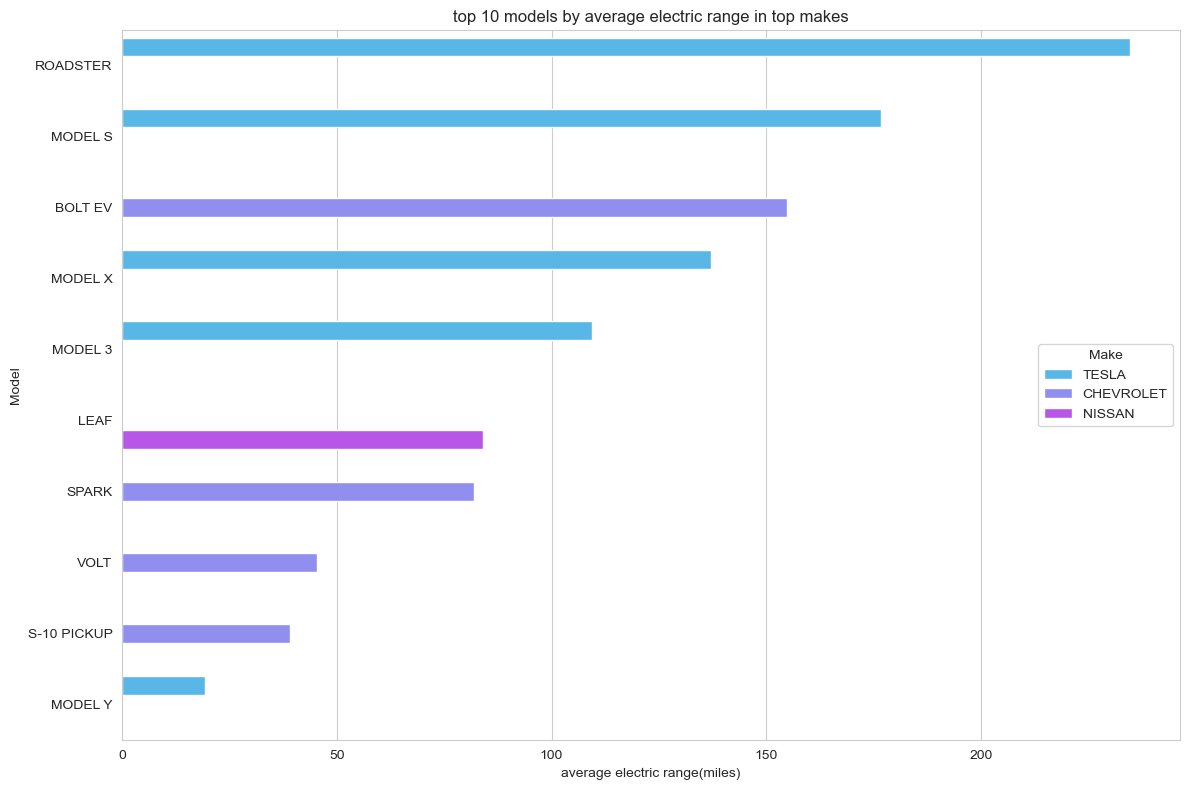

In [58]:
plt.figure(figsize=(12,8))
barplot=sns.barplot(x='Electric Range',y='Model',hue='Make',data=top_range_models,palette='cool')
plt.title('top 10 models by average electric range in top makes')
plt.xlabel('average electric range(miles)')
plt.ylabel('Model')
plt.legend(title='Make',loc='center right')
plt.tight_layout()
plt.show()

In [62]:
ev_registration_counts=ev_data['Model Year'].value_counts().sort_index()
ev_registration_counts

Model Year
1997        1
1998        1
1999        5
2000        7
2002        2
2003        1
2008       19
2010       23
2011      775
2012     1614
2013     4399
2014     3496
2015     4826
2016     5469
2017     8534
2018    14286
2019    10913
2020    11740
2021    19063
2022    27708
2023    57519
2024     7072
Name: count, dtype: int64

In [67]:
from scipy.optimize import curve_fit
filtered_years=ev_registration_counts[ev_registration_counts.index<=2023]
def exp_growth(x,a,b):
    return a*np.exp(b*x)
x_data=filtered_years.index-filtered_years.index.min()
y_data=filtered_years.values
params,covariance=curve_fit(exp_growth,x_data,y_data)
forecast_years=np.arange(2024,2024+6)-filtered_years.index.min()
forecasted_values=exp_growth(forecast_years,*params)
forecasted_evs=dict(zip(forecast_years+filtered_years.index.min(),forecasted_values))
print(forecasted_evs)

{2024: 79079.20808938889, 2025: 119653.96274428742, 2026: 181047.22020265696, 2027: 273940.74706208805, 2028: 414497.01805382164, 2029: 627171.3128407666}


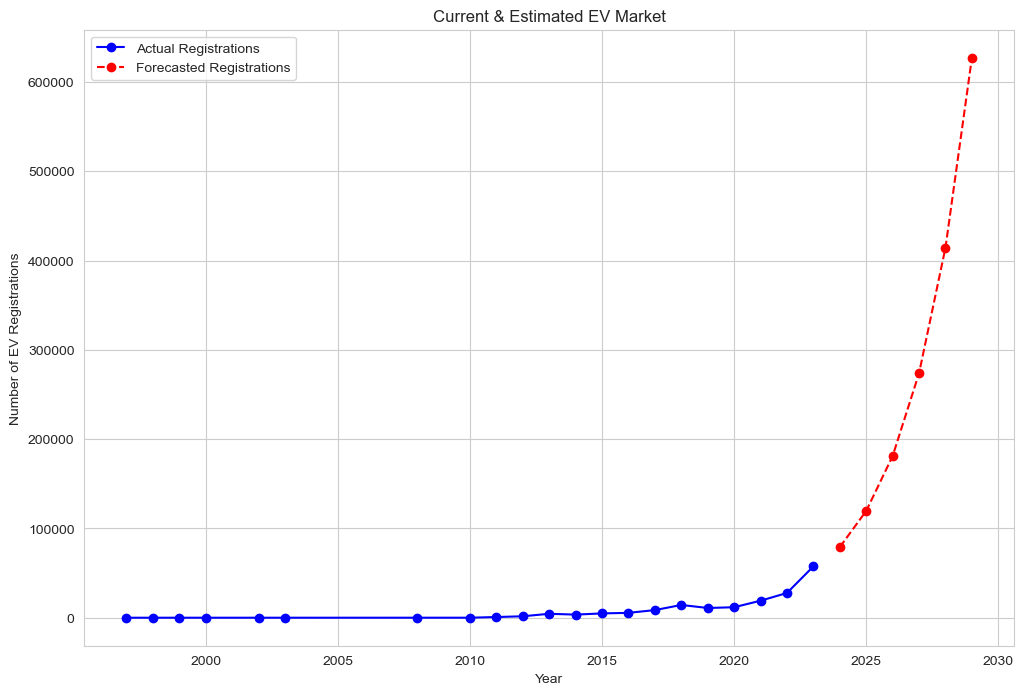

In [77]:
years = np.arange(filtered_years.index.min(), 2029 + 1)
actual_years = filtered_years.index

forecast_years_full = np.arange(2024, 2029 + 1)

actual_values = filtered_years.values
forecasted_values_full = [forecasted_evs[year] for year in forecast_years_full]

plt.figure(figsize=(12, 8))
plt.plot(actual_years, actual_values, 'bo-', label='Actual Registrations')
plt.plot(forecast_years_full, forecasted_values_full, 'ro--', label='Forecasted Registrations')
plt.title('Current & Estimated EV Market')
plt.xlabel('Year')
plt.ylabel('Number of EV Registrations')
plt.legend()
plt.grid(True)
plt.show()
